# Suggestion to address the kaggle competition taks based on the dataset:

https://www.kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip

# Data cleaning and preparation for predictive models

In [25]:
# Essential imports
import pandas as pd
import numpy as np
from datetime import datetime

#Display options
from IPython.display import display
pd.options.display.max_columns = None  
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [6]:
# Data reading 
data = pd.read_csv('/home/kodolamacz/Pobrane/jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv',encoding="latin1", header=1)


In [7]:
#Looking at the data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,

In [8]:
data.info()
data.dtypes
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB
(42542, 115)


In [9]:
# checking missing data
data.isnull().sum()  

id                                    4
member_id                             7
loan_amnt                             7
funded_amnt                           7
funded_amnt_inv                       7
term                                  7
int_rate                              7
installment                           7
grade                                 7
sub_grade                             7
emp_title                          2633
emp_length                         1119
home_ownership                        7
annual_inc                           11
verification_status                   7
issue_d                               7
loan_status                           7
pymnt_plan                            7
url                                   7
desc                              13300
purpose                               7
title                                20
zip_code                              7
addr_state                            7
dti                                   7


In [10]:
# droping columns with only missing data 
data = data.dropna(axis=1, how='all') 

# keeping only rows, which in given columns do not have missing values
data = data[pd.notnull(data['member_id'])] 
data = data[pd.notnull(data['delinq_2yrs'])]
data = data[pd.notnull(data['revol_util'])]

#removing unwanted text, changing the type of variables (mainly string into float/ integer)
data['term']=data['term'].str.replace('months', '').astype(int)
data['int_rate']=data['int_rate'].str.strip('%').astype(float)/100
data['revol_util']=data['revol_util'].str.strip('%').astype(float)/100

In [11]:
#new var for those with employment title, having title=1, otherwise=0, too many categories for dummies
data['emp_title_2']=np.where(data['emp_title'].isnull(), 0,1) 


In [12]:
# income data, dealing with missing
data.annual_inc.describe() # only 4 missing- we fill be median
data['annual_inc']=data['annual_inc'].fillna(data['annual_inc'].median())

In [13]:
# checking the distribution of a target variable:
data['loan_status'].value_counts() 
# defining our target variable:
bad_loan = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
data['target']=np.where(data['loan_status'].isin(bad_loan),1,0)
data['target'].value_counts() #checking the distribution of new values

0    36040
1     6405
Name: target, dtype: int64

In [14]:
# generating two independent variables: year and month
data['issue_d2']=data['issue_d']
data['issue_month'], data['issue_year'] = data['issue_d2'].str.split('-', 1).str # month and years separately , and into dummies



In [15]:
# generating dummies from categorical var:
data = pd.get_dummies(data, columns=['emp_length', 'grade','home_ownership', 
                                     'verification_status', 'issue_month' ,'purpose','addr_state'])

#changing few columns names

data = data.rename(columns={'emp_length_10+ years':'emp_length_more10', 'emp_length_< 1 year':'emp_length_less_one',
                            'emp_length_n/a':'emp_lenght_nan'})

In [16]:
# creating a list of variables to drop:

todrop=[ 'id', 'member_id', 'sub_grade', 'emp_title', 'pymnt_plan','url','desc', 'title', 'zip_code',  'loan_status', 
        'mths_since_last_delinq' , 'mths_since_last_record', 'initial_list_status', 
        'out_prncp', 'out_prncp_inv' ,'total_pymnt' , 'total_pymnt_inv', 'total_rec_prncp', 
      'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee','last_pymnt_d',
        'last_pymnt_amnt',  'next_pymnt_d', 'last_credit_pull_d',  'last_fico_range_high', 
        'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code','application_type','acc_now_delinq',
        'chargeoff_within_12_mths', 'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies',
        'tax_liens', 'earliest_cr_line', 'issue_d', 'issue_d2', 'issue_year']

data.drop(todrop, axis=1, inplace=True)


In [17]:
#checking the final file
data.head(10)
data.isnull().sum() 
data.shape

(42445, 121)

In [18]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,emp_title_2,target,emp_length_1 year,emp_length_more10,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_less_one,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_month_Apr,issue_month_Aug,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,4975.0,36,0.1065,162.87,24000.0,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60,0.1527,59.83,30000.0,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36,0.1596,84.33,12252.0,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36,0.1349,339.31,49200.0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,60,0.1269,67.79,80000.0,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000.0,5000.0,5000.0,36,0.0790,156.46,36000.0,11.20,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,0.283,12.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7000.0,7000.0,7000.0,60,0.1596,170.08,47004.0,23.51,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,0.856,11.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3000.0,3000

In [15]:
#Saving just in case preprocessed data are needed -in csv

data.to_csv('loan_finale.csv', header=True)  

# Models

In [19]:
# importing esential modules:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold 

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, classification_report, roc_curve, roc_auc_score

from sklearn.preprocessing import MaxAbsScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import cohen_kappa_score, make_scorer
from imblearn.pipeline import Pipeline 

In [20]:
#Creating target and explanatory variables
y = data['target']
X = data.drop(['target'], axis=1)

print(y.shape)
print(X.shape)

(42445,)
(42445, 120)


In [21]:
# training/ testing split
X_train,X_test ,y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)

(29711, 120)
(12734, 120)


In [22]:
#checking the target variable:
print(np.mean(y)) # 15 percent positive outcomes,so rather imbalanced data, but rather huge dataset so better to chose undersampling than oversampling

0.15090116621510188


In [23]:
# Pipelines for models:
 
# 1.We use: Synthetic Minority Oversampling Technique (SMOTE):#each class will be synthesized with the centroids
# of the K-means method instead of the original samples:
#2. Scaler for those methods where it is needed
#3. Models: trying Logistic Regression, Decision Tree, XGB, Random Forest, and KNN Clasificators, due to large sample size SVC is too time consuming
#4. Searching for the best parameters by cross validation, scoring matric= roc_auc
#5. Saving the best estimator in list, and the results of output in 'Grid_search_1.txt'

with open('Grid_search_1.txt', 'w') as f:

    models = [[("smt",SMOTE(kind='borderline1')), ("scaler",MaxAbsScaler()),("model",LogisticRegression())],
         [("smt", SMOTE(kind='borderline1')), ("model",DecisionTreeClassifier())],
         [("smt",SMOTE(kind='borderline1')), ("scaler",MaxAbsScaler()), ("model",XGBClassifier(probability=True))],
         [("smt", SMOTE(kind='borderline1')), ("model",RandomForestClassifier())]]
         
         
          
    param_grids = [{"model__C":[0.1,1,10,100]},
              {"model__max_depth":[3,5,10]},
              {"model__n_estimators": [50,100,150], "model__max_depth" : [2,5,8],"model__learning_rate":[0.01, 0.05,0.1]},
              {"model__n_estimators": [100,1000], "model__max_depth":[10,20] ,"model__n_jobs":[-1]}]
               
              
   
    model_names=['Logistic Regression', 'Decision Tree Classifier', 'XGB Classifier', 'Random Forest Classifier']
               
    
    best_models = []

#building pipelines for checking the best parameters for several models

    for pipe, params, name in zip(models,param_grids, model_names):

        pipeline = Pipeline(pipe)
        gs = GridSearchCV(estimator=pipeline, param_grid=params, scoring = 'roc_auc', n_jobs=-1, verbose=1)
        gs.fit(X_train,y_train)
        print(name, file=f)
        print('The parameters combination that would give best accuracy is: ', file=f)
        print(gs.best_params_, file=f)
        print('============================================================', file=f)
        best_models.append(gs.best_estimator_)
        

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.2s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.8s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.9min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.5min finished


In [26]:
# 1.Comparison of different measures of accuracy for the best parameters in our models:
# 2.Saving results in a file 
 
from sklearn.datasets import make_classification

with open('Grid_search_1_acc.txt', 'w') as f:
    for best_model, name in zip (best_models, model_names):
        print("Model:", name,file=f)
        print("AUC score on train: {0:10.3f}".format(roc_auc_score(best_model.predict(X_train),y_train)), file=f)
        print("AUC score on test:  {0:10.3f}".format(roc_auc_score(best_model.predict(X_test),y_test)), file=f)
        print(classification_report(y_test,best_model.predict(X_test)) ,file=f)
        print('========================================================',file=f)
   


In [27]:
#1. Result of cross- validation based on the different scoring: on cohen_kappa_score, better suited for imbalanced data
#2. Results saved in  'Grid_search_2.txt'


#Importing essential modules:
from sklearn.metrics import cohen_kappa_score, make_scorer

kappa_scorer = make_scorer(cohen_kappa_score)

with open('Grid_search_2.txt', 'w') as f:

    models = [[("smt",SMOTE(kind='borderline1')), ("scaler",MaxAbsScaler()),("model",LogisticRegression())],
         [("smt", SMOTE(kind='borderline1')), ("model",DecisionTreeClassifier())],
         [("smt",SMOTE(kind='borderline1')), ("scaler",MaxAbsScaler()), ("model",XGBClassifier(probability=True))],
         [("smt", SMOTE(kind='borderline1')), ("model",RandomForestClassifier())],
         [("smt", SMOTE(kind='borderline1')),("scaler",MaxAbsScaler()),("model",KNeighborsClassifier())] ]
                   
    param_grids = [{"model__C":[0.1,1,10,100]},
              {"model__max_depth":[3,5,10]},
              {"model__n_estimators": [50,100,150], "model__max_depth" : [2,5,8],"model__learning_rate":[0.01, 0.05,0.1]},
              {"model__n_estimators": [100,1000], "model__max_depth":[10,20] ,"model__n_jobs":[-1]},
               {"model__n_neighbors":[5,10,20]}]
             
   
    model_names=['Logistic Regression', 'Decision Tree Classifier', 'XGB Classifier', 'Random Forest Classifier']
               
     
    best_models = []

#building pipelines for checking the best parameters for several models

    for pipe, params, name in zip(models,param_grids, model_names):

        pipeline = Pipeline(pipe)
        gs = GridSearchCV(estimator=pipeline, param_grid=params, scoring = kappa_scorer, n_jobs=-1, verbose=1)
        gs.fit(X_train,y_train)
        print(name,file=f)
        print('The parameters combination that would give best accuracy is: ',file=f)
        print(gs.best_params_,file=f)
        print('============================================================',file=f)
        best_models.append(gs.best_estimator_)
        

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.8s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.5min finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.4min finished


# Model selection using evaluation metrics

In [28]:
# 1.Comparison of different measures of accuracy for the best parameters in our models:
# 2.Saving results in a file 

from sklearn.datasets import make_classification
with open('Grid_search_2_acc.txt', 'w') as f:
    for best_model, name in zip (best_models, model_names):
        print("Model:", name,file=f)
        print("AUC score on train: {0:10.3f}".format(roc_auc_score(best_model.predict(X_train),y_train)),file=f)
        print("AUC score on test:  {0:10.3f}".format(roc_auc_score(best_model.predict(X_test),y_test)),file=f)
        print(classification_report(y_test,best_model.predict(X_test)),file=f)
        print('========================================================',file=f)
  
    
# 3. As we are interested in predicting those not abble to pay a loan, it seems that the most important accuracy measure is Recall = TP/(TP+FN):
# 4. Due to the imbalacing of the data - only 15% of positive outcome, many observations could be predicted as False Negatives, meaning
# that we predict a fully paid loan, but it is in fact charged off, based on the comaprison of this accuracy measure between models, 
# the first one: Logistic regression seems to be the best suited to the problem, and the second tuning of paramters using kappa score.


# GRAPHS


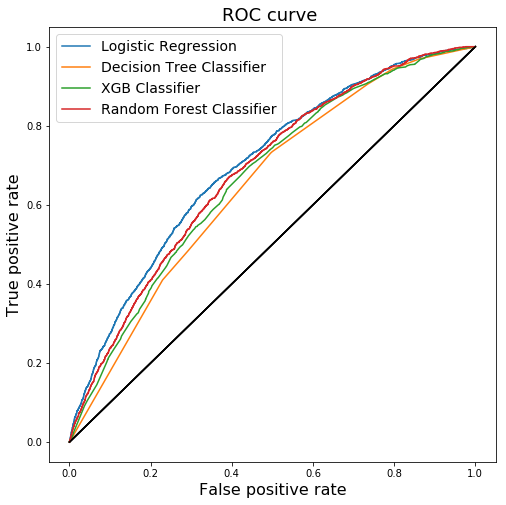

In [29]:
# Graph of the ROC curve

from sklearn import metrics

for best_model, name in zip (best_models, model_names):
    y_pred = best_model.predict(X_test)
    y_score = best_model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

    fig=plt.figure(1, figsize=(8,8))
    plt.xlabel('False positive rate', fontsize=16)
    plt.ylabel('True positive rate', fontsize=16)
    plt.title('ROC curve ', fontsize=18)
    plt.plot(fpr, tpr, label = name )
    plt.legend(loc=2, prop={'size':14})
    plt.plot([0,1],[0,1], color = 'black')
plt.show()
fig.savefig('ROC_curve.png')   
     

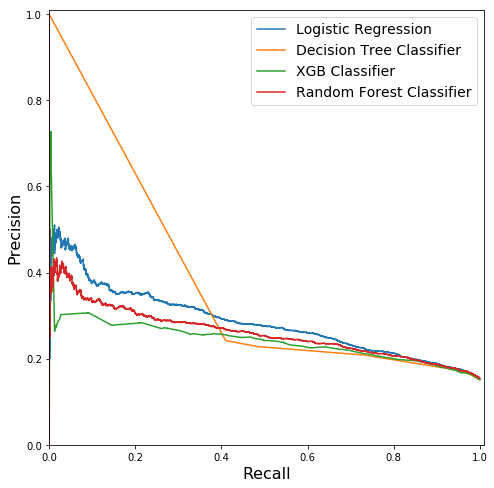

In [30]:
#Aditionally we prepare a graph of recall/precision curve:

from sklearn.metrics import precision_recall_curve
model_names=['Logistic Regression', 'Decision Tree Classifier', 'XGB Classifier', 'Random Forest Classifier']

for best_model, name in zip (best_models, model_names):
    
    y_pred = best_model.predict(X_test)
    y_score = best_model.predict_proba(X_test)[:,1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    fig=plt.figure(1, figsize=(8,8))
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot( recall, precision,label=name)
    plt.plot(closest_zero_p, closest_zero_r, fillstyle = 'none', c='r', mew=3)
    plt.legend(loc=1, prop={'size':14})
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.axes().set_aspect('equal')
plt.show()
fig.savefig('Precision_Recall_curve.png')  


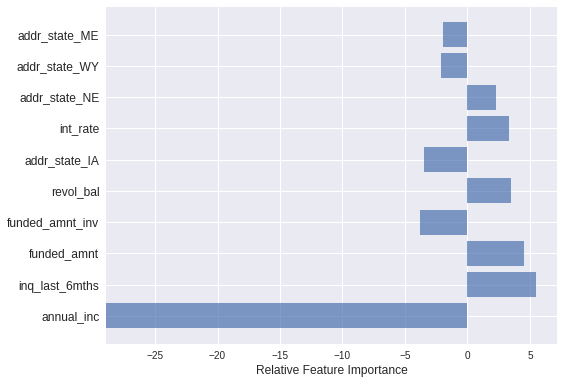

In [31]:
# As we decided to chose logistic regression due to the best accuracy to the problem, 
# we could look a little closer to the largest features for the prediction (scaled before the regression), presented at the graph 

import numpy as np
import seaborn as sns

a=best_models[0].named_steps['model'].coef_
a.shape
#print(a)  

feature=best_models[0].named_steps['model'].coef_
feature_2 = abs(feature)
sorted_idx = np.argsort(-feature_2)
sorted_idx_15= sorted_idx[0,:10]
y_pos=np.arange(len(sorted_idx_15))
#print(feature)
#print(y_pos)
#print(sorted_idx_15)
#print(feature[0,sorted_idx_15])


featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(y_pos, feature[0,sorted_idx_15], align='center', alpha=0.7)
featax.set_yticks(y_pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx_15], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=12)
plt.tight_layout()   
plt.show()
fig.savefig('Relative_features.png')  
